## Outliers and its impact on ML

## Outlier:  
              An Outlier is an observation that lies an abnormal distance from other values in a random sample from a population.

#### Which Machine learning algorithms are sensitive to outliers?
- Naive bayes classifier--- Not sensitive to outliers
- Support vector machine--- Not Sensitive to outlier
- Linear Regression-------- Sensitive to outliers
- Logistic Regression------ Sensitive to outliers
- Decision tree, Regressor, Classifier--- Not Sensitive
- Ensemble( RF-Random Forest, XGboost, GB-Gradient boosting)--- Not sensitive
- KNN(K-nearest neighbors)-- Not Sensitive
- Kmeans------------ Sensitive
- Hierarichal-- Sensitive
- PCA(Principle component analysis)--- Sensitive
- Neural networks-- Sensitive

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
df=pd.read_csv('Titanic_train.csv.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df['Age'].isnull().sum()

177

In [28]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

C:\Users\yash.jha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

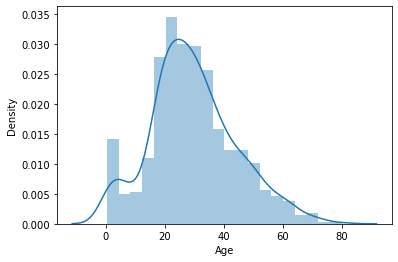

In [29]:
sns.distplot(df['Age'].dropna())

C:\Users\yash.jha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

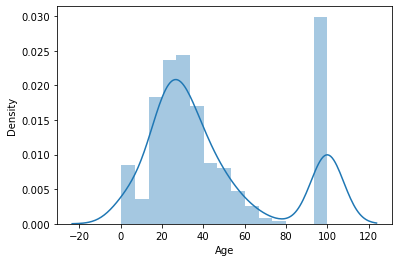

In [34]:
## Here we can see, There is not any such outlier so we will be adding outlier where nan values are present

sns.distplot(df['Age'].fillna(100))

#### Gaussian or Normal distributed data

Text(0, 0.5, 'No. of Passenger')

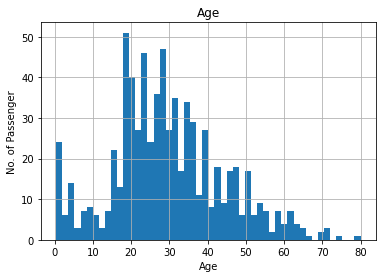

In [30]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No. of Passenger')

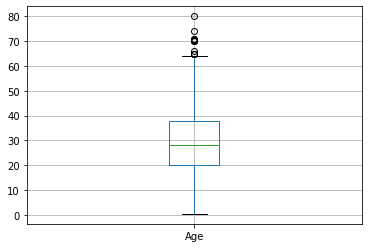

In [31]:
figure=df.boxplot(column='Age')

In [35]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [36]:
## Assuming Age follows the gaussian distribution.So, We will calculate the boundries which differentiates the outliers.

upper_boundary=df['Age'].mean()+ 3* df['Age'].std()
lower_boundary=df['Age'].mean()-3*df['Age'].std()
print(lower_boundary),print(upper_boundary),print(df['Age'].mean())

-13.88037434994331
73.27860964406095
29.69911764705882


(None, None, None)

### When feature is skewed

Text(0, 0.5, 'No. of Passenger')

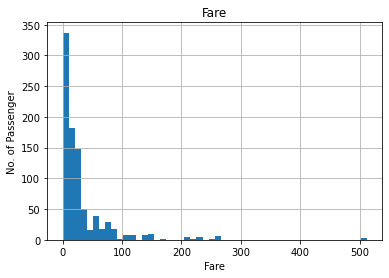

In [40]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No. of Passenger')

<AxesSubplot:>

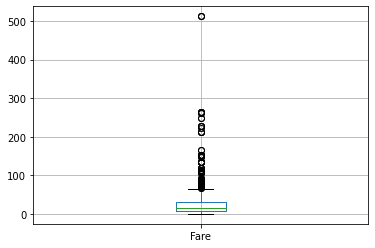

In [42]:
df.boxplot(column='Fare')

In [43]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [44]:
# Let's compute the interquantile range to calculate the boundaries
IQR=df.Fare.quantile(0.75)-df['Fare'].quantile(0.25)
IQR

23.0896

In [46]:
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-26.724
65.6344


In [48]:
## Extreme outlier 
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge)
print(upper_bridge)

-61.358399999999996
100.2688


In [49]:
data=df.copy()

In [50]:
data.loc[data['Age']>=73,'Age']=73

In [52]:
data.loc[data['Fare']>=100,'Fare']=100

Text(0, 0.5, 'No. of Passenger')

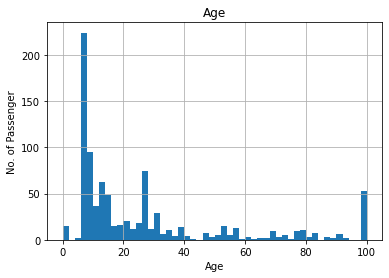

In [54]:
figure=data.Fare.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No. of Passenger')

Text(0, 0.5, 'No. of Passenger')

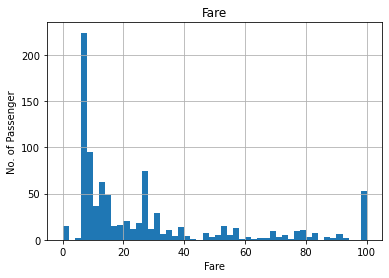

In [53]:
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No. of Passenger')

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [60]:
## Logistic Regression

from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))


accuracy_score: 0.6417910447761194
roc_auc_score: 0.6452976190476191


In [61]:
## RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))


accuracy_score: 0.6529850746268657
roc_auc_score: 0.7138988095238094
